In [1]:
%install-swiftpm-flags -c release
%install '.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")' SwiftProtobuf
import SwiftProtobuf

Installing packages:
	.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")
		SwiftProtobuf
With SwiftPM flags: ['-c', 'release']
Working in: /tmp/tmpn3_a3bfa/swift-install
Fetching https://github.com/apple/swift-protobuf.git
Cloning https://github.com/apple/swift-protobuf.git
Resolving https://github.com/apple/swift-protobuf.git at 1.7.0
[1/2] Compiling SwiftProtobuf AnyMessageStorage.swift
[2/3] Compiling jupyterInstalledPackages jupyterInstalledPackages.swift
[3/3] Linking libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


In [2]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [3]:
import Python
import TensorFlow

In [4]:
let plt = Python.import("matplotlib.pyplot")

In [5]:
let SAMPLE_SIZE = 100

let a: Float = 2.0
let b: Float = 1.5
let x = Tensor<Float>(rangeFrom: 0, to: 1, stride: 1.0 / Float(SAMPLE_SIZE))
let noise = (Tensor<Float>(randomNormal: [SAMPLE_SIZE]) - 0.5) * 0.1
let y = (a * x + b) + noise

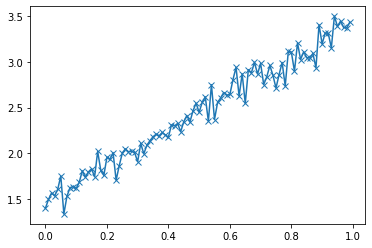

None


In [6]:
plt.clf()
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), marker: "x")
plt.show()

In [7]:
print(x.shape)
print(y.shape)

[100]
[100]


In [8]:
let X = x.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
let Y = y.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
print(X.shape)
print(Y.shape)

[100, 1]
[100, 1]


In [9]:
struct LinearRegression: Layer {
    var layer1 = Dense<Float>(inputSize: 1, outputSize: 1, activation: identity)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer1(input)
    }
}


In [10]:
var regression = LinearRegression()
let optimizer = SGD(for: regression, learningRate: 0.03)
Context.local.learningPhase = .training

In [11]:
for _ in 0..<1000 {
    let 𝛁model = regression.gradient { r -> Tensor<Float> in
        let ŷ = r(X)
        let loss = meanSquaredError(predicted: ŷ, expected: Y)
        print("Loss: \(loss)")
        return loss
    }
    optimizer.update(&regression, along: 𝛁model)
}

Loss: 7.014071
Loss: 6.007771
Loss: 5.14802
Loss: 4.4134617
Loss: 3.7858493
Loss: 3.249597
Loss: 2.7913916
Loss: 2.3998578
Loss: 2.0652802
Loss: 1.7793585
Loss: 1.5350021
Loss: 1.326154
Loss: 1.1476401
Loss: 0.9950399
Loss: 0.8645772
Loss: 0.75302696
Loss: 0.6576332
Loss: 0.5760423
Loss: 0.5062431
Loss: 0.44651803
Loss: 0.39539948
Loss: 0.3516339
Loss: 0.31415042
Loss: 0.28203422
Loss: 0.2545039
Loss: 0.23089166
Loss: 0.21062736
Loss: 0.19322369
Loss: 0.17826454
Loss: 0.16539432
Loss: 0.15430932
Loss: 0.14475006
Loss: 0.13649486
Loss: 0.12935442
Loss: 0.123166904
Loss: 0.117794216
Loss: 0.11311822
Loss: 0.109038055
Loss: 0.10546759
Loss: 0.10233316
Loss: 0.099571936
Loss: 0.09713016
Loss: 0.09496194
Loss: 0.09302806
Loss: 0.091295
Loss: 0.08973414
Loss: 0.08832101
Loss: 0.08703471
Loss: 0.085857384
Loss: 0.08477378
Loss: 0.083770856
Loss: 0.08283745
Loss: 0.08196404
Loss: 0.081142485
Loss: 0.08036584
Loss: 0.079628125
Loss: 0.07892425
Loss: 0.07824989
Loss: 0.0776013
Loss: 0.07697532
L

Loss: 0.01264544
Loss: 0.012635334
Loss: 0.0126253115
Loss: 0.012615367
Loss: 0.012605502
Loss: 0.012595718
Loss: 0.01258601
Loss: 0.012576376
Loss: 0.012566818
Loss: 0.012557337
Loss: 0.012547929
Loss: 0.012538596
Loss: 0.012529335
Loss: 0.012520151
Loss: 0.012511042
Loss: 0.0125020025
Loss: 0.012493028
Loss: 0.012484132
Loss: 0.012475301
Loss: 0.012466547
Loss: 0.012457857
Loss: 0.012449236
Loss: 0.012440685
Loss: 0.012432199
Loss: 0.0124237845
Loss: 0.012415428
Loss: 0.012407145
Loss: 0.012398928
Loss: 0.012390775
Loss: 0.012382683
Loss: 0.012374661
Loss: 0.012366694
Loss: 0.012358794
Loss: 0.012350958
Loss: 0.012343181
Loss: 0.012335467
Loss: 0.012327816
Loss: 0.012320225
Loss: 0.012312692
Loss: 0.012305217
Loss: 0.012297804
Loss: 0.012290449
Loss: 0.012283151
Loss: 0.012275913
Loss: 0.012268736
Loss: 0.012261608
Loss: 0.012254539
Loss: 0.012247521
Loss: 0.012240567
Loss: 0.012233666
Loss: 0.012226817
Loss: 0.012220022
Loss: 0.012213282
Loss: 0.012206596
Loss: 0.012199961
Loss: 0.0

In [12]:
print(regression.layer1.weight)
print(regression.layer1.bias)

[[1.9279838]]
[1.4895443]


In [13]:
Context.local.learningPhase = .inference
let score = regression(X)
let y2 = score.reshaped(toShape: [100])

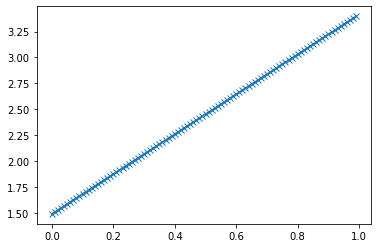

None


In [14]:
plt.clf()
plt.plot(x.makeNumpyArray(), y2.makeNumpyArray(), marker: "x")
plt.show()

In [15]:
%include "./CoreMLProto/ArrayFeatureExtractor.pb.swift"

In [16]:
%include "./CoreMLProto/BayesianProbitRegressor.pb.swift"

In [17]:
%include "./CoreMLProto/DataStructures.pb.swift"

In [18]:
%include "./CoreMLProto/CategoricalMapping.pb.swift"

In [19]:
%include "./CoreMLProto/CustomModel.pb.swift"

In [20]:
%include "./CoreMLProto/DictVectorizer.pb.swift"

In [21]:
%include "./CoreMLProto/FeatureTypes.pb.swift"

In [22]:
%include "./CoreMLProto/FeatureVectorizer.pb.swift"

In [23]:
%include "./CoreMLProto/GLMClassifier.pb.swift"

In [24]:
%include "./CoreMLProto/GLMRegressor.pb.swift"

In [25]:
%include "./CoreMLProto/Gazetteer.pb.swift"

In [26]:
%include "./CoreMLProto/Identity.pb.swift"

In [27]:
%include "./CoreMLProto/Imputer.pb.swift"

In [28]:
%include "./CoreMLProto/Scaler.pb.swift"

In [29]:
%include "./CoreMLProto/ItemSimilarityRecommender.pb.swift"

In [30]:
%include "./CoreMLProto/Parameters.pb.swift"

In [31]:
%include "./CoreMLProto/Normalizer.pb.swift"

In [32]:
%include "./CoreMLProto/LinkedModel.pb.swift"

In [33]:
%include "./CoreMLProto/NearestNeighbors.pb.swift"

In [34]:
%include "./CoreMLProto/NonMaximumSuppression.pb.swift"

In [35]:
%include "./CoreMLProto/OneHotEncoder.pb.swift"

In [36]:
%include "./CoreMLProto/SVM.pb.swift"

In [37]:
%include "./CoreMLProto/SoundAnalysisPreprocessing.pb.swift"

In [38]:
%include "./CoreMLProto/TextClassifier.pb.swift"

In [39]:
%include "./CoreMLProto/TreeEnsemble.pb.swift"

In [40]:
%include "./CoreMLProto/VisionFeaturePrint.pb.swift"

In [41]:
%include "./CoreMLProto/WordEmbedding.pb.swift"

In [42]:
%include "./CoreMLProto/WordTagger.pb.swift"

In [46]:
%include "./CoreMLProto/NeuralNetwork.pb.swift"

In [47]:
%include "./CoreMLProto/Model.pb.swift"

In [56]:
let coreModel = CoreML_Specification_Model.with {
    $0.specificationVersion = 4
    $0.description_p = CoreML_Specification_ModelDescription.with {
        $0.input = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            
        }]
        $0.output = [CoreML_Specification_FeatureDescription.with {
            $0.name = "Identity"

            
        }] 
//         $0.metadata.with {
//             $0.userDefined
//         } 
    }
}

In [51]:
let binaryModelData: Data = try coreModel.serializedData()

In [52]:
binaryModelData.write(to: URL(fileURLWithPath: "./s4tf_model.mlmodel"))